In [3]:
import numpy as np
import pickle
from src.load_results import *
from src.plot_tools import *
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

%matplotlib inline
nb_average = 4
nb_load = 4
plot_option = "print_and_save" ## "print" or "save" or "print_and_save"

In [4]:
list_family = ['GPCR', 'IC', 'kinase']
list_type_family = ['TotKernel', 'FamilyKernel']
list_type_of_nei = ["Inter", "Intra"]


list_script_MT = ['MultiNeerestNeiLOOCV', 'MultiRandomNeiLOOCV']
list_type_of_SingleTask_MT = ['Kron']
list_type_of_clf_MT = ['SVM']
list_NbNeg_MT = ['1', '5', '10', '50', 'full']
list_nb_pos = ['0']
list_nb_neg = ['1']

#### temporary
list_type_of_nei = ["Intra"]
list_difficulty = ['normal']

dico_auc_type_SingleTask_MT, dico_auc_stdev_type_SingleTask_MT, \
dico_aupr_type_SingleTask_MT, dico_aupr_stdev_type_SingleTask_MT \
= load_family_results(list_script_MT, list_type_of_SingleTask_MT,list_type_of_clf_MT, 
                      list_NbNeg_MT, list_nb_pos, list_nb_neg, list_type_of_nei, list_difficulty,
                      list_family, list_type_family, 0, {})


1
1
5
1
[0.88724762906565147, 0.91495191344419957, 0.91585061443932414, 0.91537392306151066, 0.91844845722300139]


/home/beubeu/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


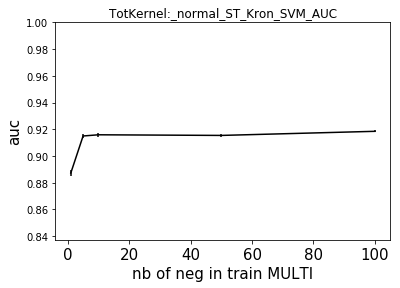

[0.89512042227347655, 0.91807140362785056, 0.91906493729453043, 0.92681771274651359, 0.92595290351805448]


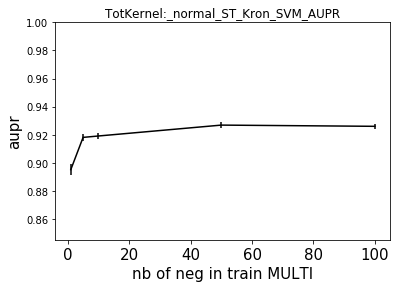

1
1
5
1
[0.94330469845722298, 0.96069917518199421, 0.96260301876711407, 0.96484647365257459, 0.96433037801375809]


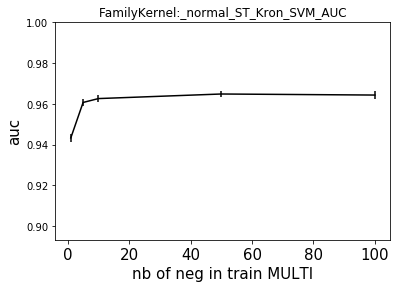

[0.94533746023030352, 0.95917140459891159, 0.96075651295754194, 0.96193805836239366, 0.96301839591939342]


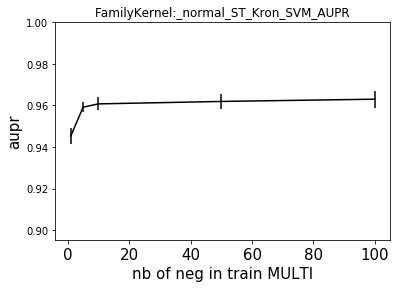

1
1
5
1
[0.93901262839083999, 0.95403511850252776, 0.95679460687626383, 0.95914134628560865, 0.95211092999630043]


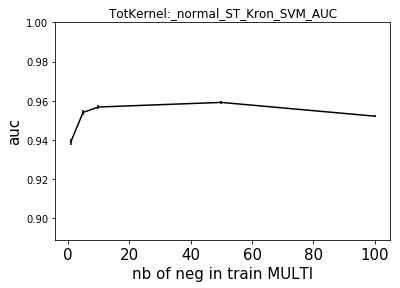

[0.95004106769329233, 0.9598666552621159, 0.96171983221170898, 0.9634406495545883, 0.95974302184955518]


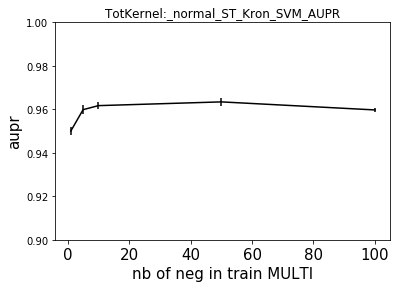

1
1
5
1
[0.95412915888496252, 0.96468012100833023, 0.96700201589971513, 0.96719436681610904, 0.96465935254409807]


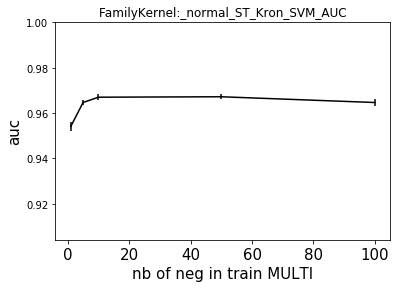

[0.96110109085239925, 0.96862744580557791, 0.97025137510548065, 0.97101245272936887, 0.96962857788999812]


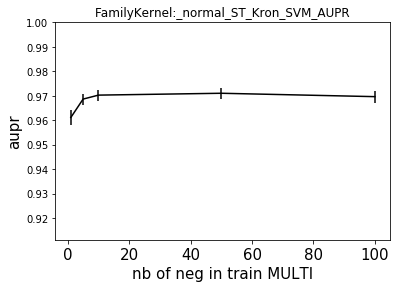

1
1
5
1
[0.75734885237099969, 0.87589677776347252, 0.83872004919779652, 0.85442376122085051, 0.86498752249648692]


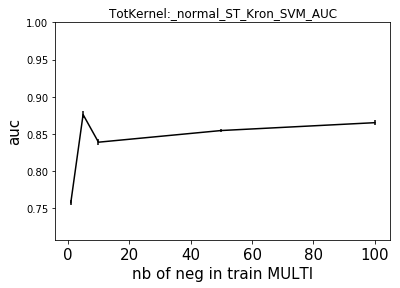

[0.79778371569109607, 0.87111171588302216, 0.85947892145575977, 0.89181915850011551, 0.88719940440949474]


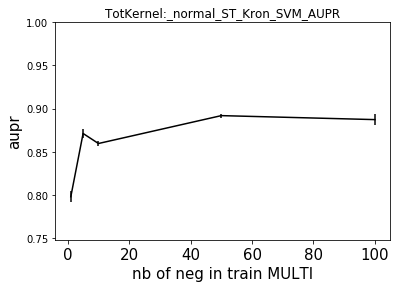

1
1
5
1
[0.79769289453427827, 0.89212848952355395, 0.85764380630969961, 0.86861606543635661, 0.88324734219587619]


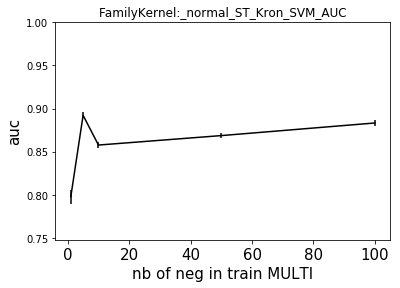

[0.84635800487816637, 0.8824193338300852, 0.88533632649304006, 0.89842219065748308, 0.90987234956002094]


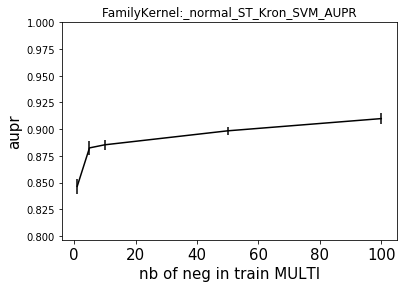

In [3]:
## observer l'effet de NbNeg en single task pour trouver best_NbNeg_MT

type_of_nei = "Intra"
difficulty = 'normal'
for type_clf in list_type_of_clf_MT:
    for type_of_SingleTask in list_type_of_SingleTask_MT:
        for family in list_family:
            for type_family in list_type_family:
                list_of_list_of_auc_local = [[]]
                list_of_list_of_auc_local_stdev = [[]]
                list_of_list_of_aupr_local = [[]]
                list_of_list_of_aupr_local_stdev = [[]]

                list_nom = ['']
                for NbNeg in list_NbNeg_MT:
                    for type_of_nei in ["Intra"]:
                        for nb_pos in ['0']:
                            #list_nom[0].append(type_of_nei+':_'+NbNeg)
                            list_of_list_of_auc_local[0]+=dico_auc_type_SingleTask_MT['MultiNeerestNeiLOOCV'][type_clf][type_family][family][type_of_SingleTask][NbNeg][type_of_nei][nb_pos]
                            list_of_list_of_auc_local_stdev[0]+=dico_auc_stdev_type_SingleTask_MT['MultiNeerestNeiLOOCV'][type_clf][type_family][family][type_of_SingleTask][NbNeg][type_of_nei][nb_pos]
                            list_of_list_of_aupr_local[0]+=dico_aupr_type_SingleTask_MT['MultiNeerestNeiLOOCV'][type_clf][type_family][family][type_of_SingleTask][NbNeg][type_of_nei][nb_pos]
                            list_of_list_of_aupr_local_stdev[0]+=dico_aupr_stdev_type_SingleTask_MT['MultiNeerestNeiLOOCV'][type_clf][type_family][family][type_of_SingleTask][NbNeg][type_of_nei][nb_pos]
                dico_plot = {'pp':None, 'f_out':None}
                if plot_option=="save" or plot_option=="print_and_save":
                    dico_plot['pp'] = PdfPages('saved_results/plots/family/'+difficulty+'/IntraNei_ST/ST_'+family+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_for_IntraNei.pdf')
                    dico_plot['f_out'] = open('saved_results/plots/family/'+difficulty+'/IntraNei_ST/ST_'+family+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_for_IntraNei.txt', 'w')
                print(len(list_of_list_of_auc_local))
                print(len(list_of_list_of_auc_local_stdev))
                print(len(list_NbNeg_MT))
                print(len(list_nom))
                plot_score_curve(type_family+':_'+difficulty+'_ST_'+type_of_SingleTask+'_'+type_clf+"_AUC",\
                                 list_of_list_of_auc_local, list_of_list_of_auc_local_stdev, \
                                 list_NbNeg_MT, 'auc', 'nb of neg in train MULTI', \
                                 list_nom, '', plot_option, **dico_plot)
                if plot_option=="save" or plot_option=="print_and_save":
                    dico_plot['pp'].close()
                    dico_plot['f_out'].close()

                dico_plot = {'pp':None, 'f_out':None}
                if plot_option=="save" or plot_option=="print_and_save":
                    dico_plot['pp'] = PdfPages('saved_results/plots/family/'+difficulty+'/IntraNei_ST/ST_'+family+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_for_IntraNei.pdf')
                    dico_plot['f_out'] = open('saved_results/plots/family/'+difficulty+'/IntraNei_ST/ST_'+family+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_for_IntraNei.txt', 'w')
                plot_score_curve(type_family+':_'+difficulty+'_ST_'+type_of_SingleTask+'_'+type_clf+"_AUPR",\
                                 list_of_list_of_aupr_local, list_of_list_of_aupr_local_stdev, \
                                 list_NbNeg_MT, 'aupr', 'nb of neg in train MULTI', \
                                 list_nom, '', plot_option, **dico_plot)
                if plot_option=="save" or plot_option=="print_and_save":
                    dico_plot['pp'].close()
                    dico_plot['f_out'].close()  



In [14]:
list_family = ['GPCR', 'IC', 'kinase']
list_type_family = ['TotKernel', 'FamilyKernel']
list_type_of_nei = ["Inter", "Intra"]


list_script_MT = ['MultiNeerestNeiLOOCV', 'MultiRandomNeiLOOCV']
list_type_of_SingleTask_MT = ['Kron']
list_type_of_clf_MT = ['SVM']
list_NbNeg_MT = ['1', '5', '10', '50', 'full']
list_nb_pos = ['0','1', '10', '50', '100']
list_nb_neg = ['1','2','5','10', '20']

list_type_of_inter = ["Neerest", "Random"]
list_nb_pos_inter = ['1', '5', '10']
list_nb_neg_inter = ['1','2','5','10']

best_NbNeg = {'normal':{'TotKernel':'50', 'FamilyKernel':'full'}}


#### temporary
list_type_of_nei = ["Intra"]
list_difficulty = ['normal']


dico_auc_type_SingleTask_MT, dico_auc_stdev_type_SingleTask_MT, \
dico_aupr_type_SingleTask_MT, dico_aupr_stdev_type_SingleTask_MT \
= load_family_results(list_script_MT, list_type_of_SingleTask_MT,list_type_of_clf_MT, 
                      list_NbNeg_MT, list_nb_pos, list_nb_neg, list_type_of_nei, list_difficulty,
                      list_family, list_type_family, 0, best_NbNeg)


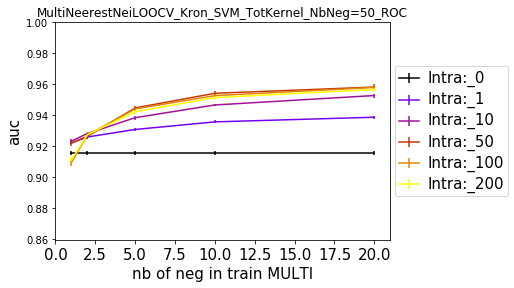

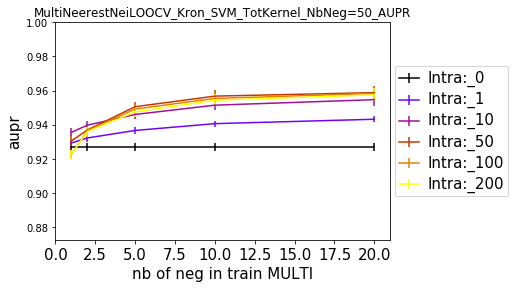

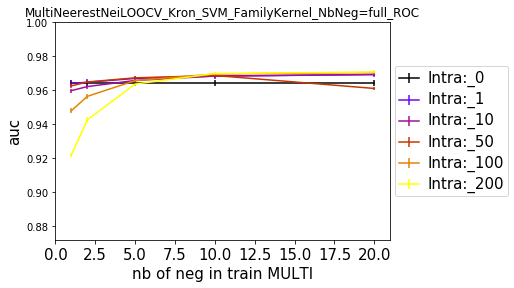

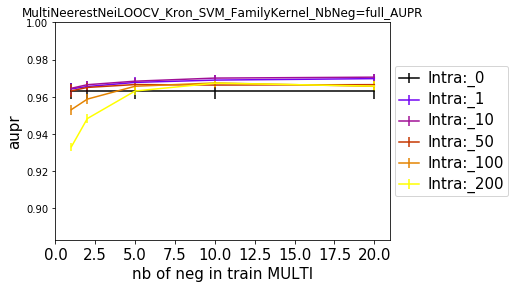

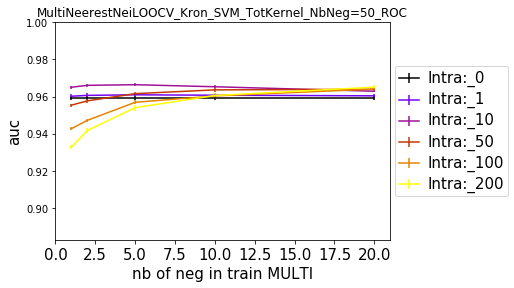

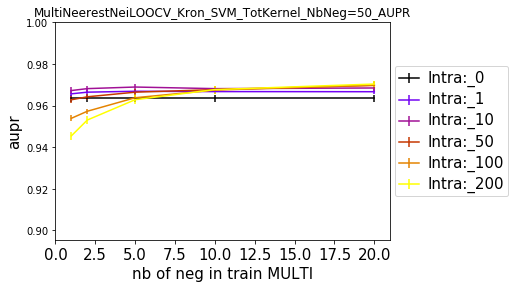

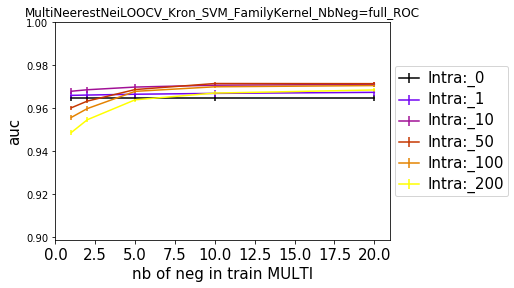

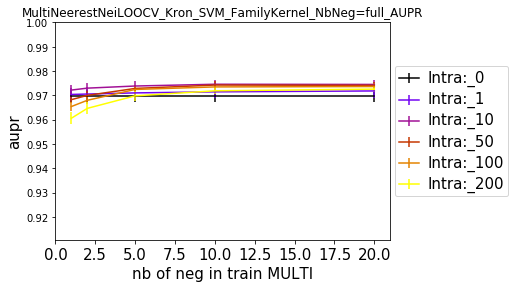

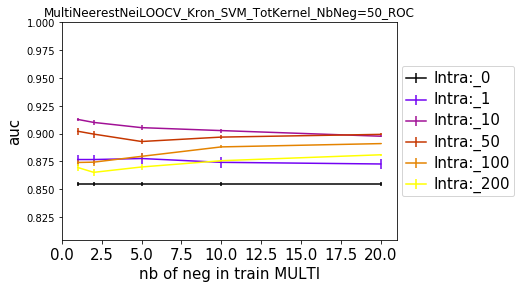

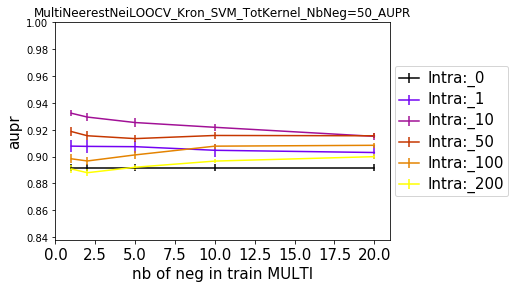

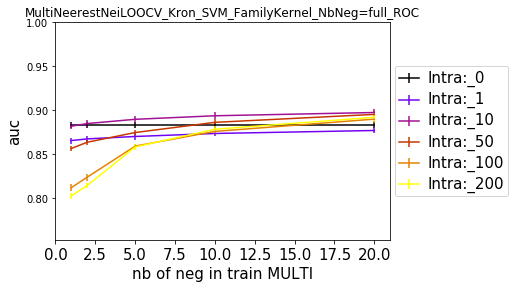

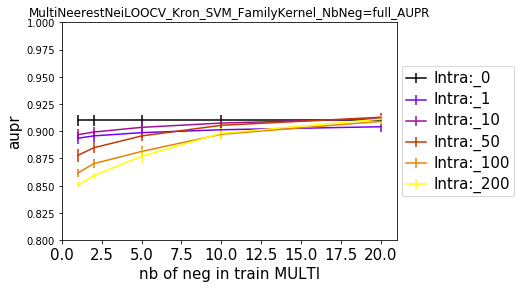

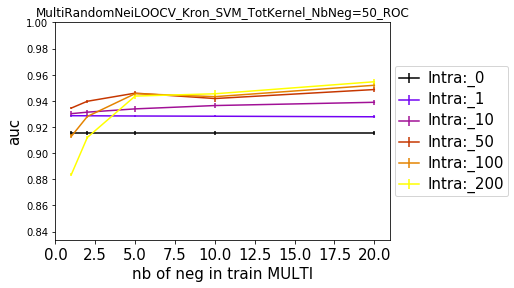

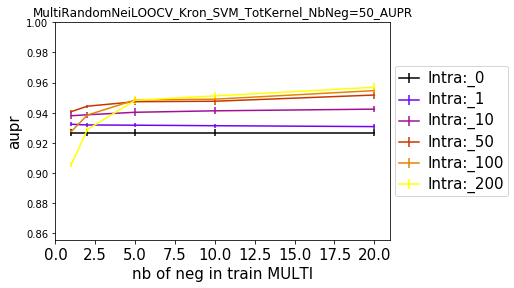

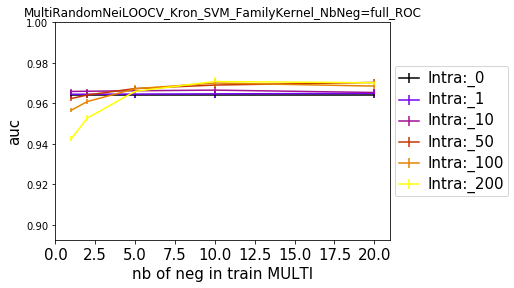

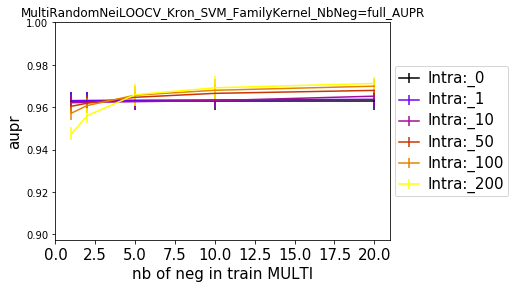

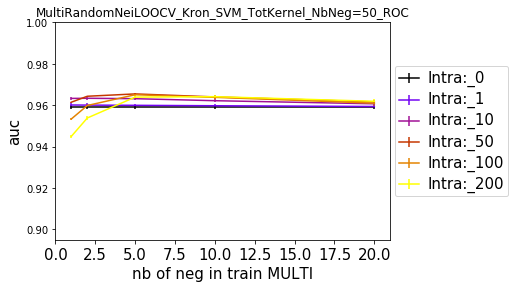

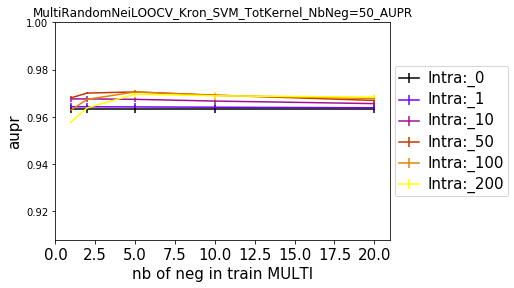

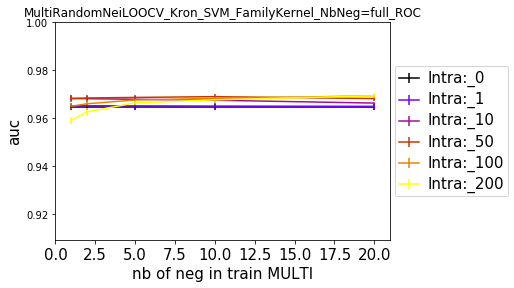

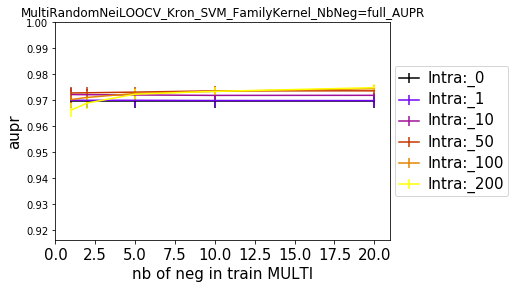

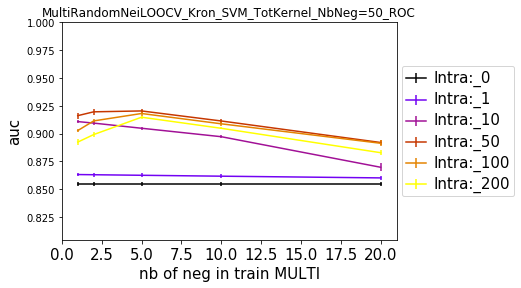

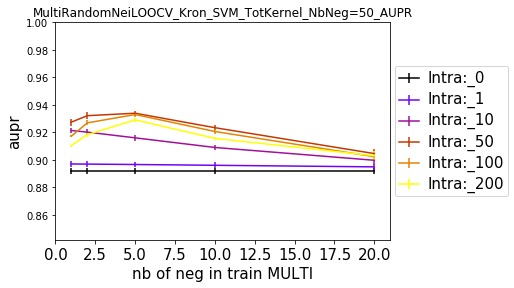

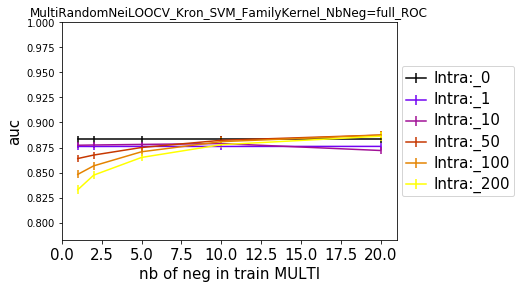

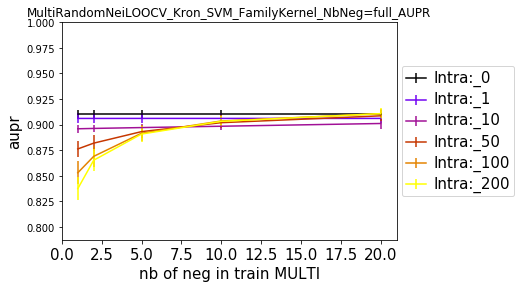

In [9]:
## en Totkernel & Intra fixé, voir effet de nb_pos en fct de nb_neg (sur x_axis) pour chaque NbNeg_MT (plot différent pour chaque nb_neg)


for type_clf in list_type_of_clf_MT:
    for type_of_SingleTask in list_type_of_SingleTask_MT:
        for script in list_script_MT:
            for family in list_family:
                for type_family in list_type_family:
                    NbNeg = best_NbNeg[difficulty][type_family]

                    list_of_list_of_auc_local = []
                    list_of_list_of_auc_local_stdev = []
                    list_of_list_of_aupr_local = []
                    list_of_list_of_aupr_local_stdev = []

                    list_nom = []
                    for type_of_nei in ["Intra"]:
                        for nb_pos in list_nb_pos:
                            list_nom.append(type_of_nei+':_'+nb_pos)
                            list_of_list_of_auc_local.append(dico_auc_type_SingleTask_MT[script][type_clf][type_family][family][type_of_SingleTask][NbNeg][type_of_nei][nb_pos])
                            list_of_list_of_auc_local_stdev.append(dico_auc_stdev_type_SingleTask_MT[script][type_clf][type_family][family][type_of_SingleTask][NbNeg][type_of_nei][nb_pos])
                            list_of_list_of_aupr_local.append(dico_aupr_type_SingleTask_MT[script][type_clf][type_family][family][type_of_SingleTask][NbNeg][type_of_nei][nb_pos])
                            list_of_list_of_aupr_local_stdev.append(dico_aupr_stdev_type_SingleTask_MT[script][type_clf][type_family][family][type_of_SingleTask][NbNeg][type_of_nei][nb_pos])
                    
                    dico_plot = {'pp':None, 'f_out':None}
                    if plot_option=="save" or plot_option=="print_and_save":
                        dico_plot['pp'] = PdfPages('saved_results/plots/family/'+difficulty+'/IntraNei/'+script+'_'+family+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_for_IntraNei.pdf')
                        dico_plot['f_out'] = open('saved_results/plots/family/'+difficulty+'/IntraNei/'+script+'_'+family+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_for_IntraNei.txt', 'w')
                    plot_score_curve(script+'_'+type_of_SingleTask+'_'+type_clf+'_'+type_family+'_NbNeg='+NbNeg+"_ROC", \
                                     list_of_list_of_auc_local, list_of_list_of_auc_local_stdev, \
                                     list_nb_neg, 'auc', 'nb of neg in train MULTI', \
                                     list_nom, '', plot_option, **dico_plot)
                    if plot_option=="save" or plot_option=="print_and_save":
                        dico_plot['pp'].close()
                        dico_plot['f_out'].close()

                    dico_plot = {'pp':None, 'f_out':None}
                    if plot_option=="save" or plot_option=="print_and_save":
                        dico_plot['pp'] = PdfPages('saved_results/plots/family/'+difficulty+'/IntraNei/'+script+'_'+family+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_for_IntraNei.pdf')
                        dico_plot['f_out'] = open('saved_results/plots/family/'+difficulty+'/IntraNei/'+script+'_'+family+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_for_IntraNei.txt', 'w')
                    plot_score_curve(script+'_'+type_of_SingleTask+'_'+type_clf+'_'+type_family+'_NbNeg='+NbNeg+"_AUPR", \
                                     list_of_list_of_aupr_local, list_of_list_of_aupr_local_stdev, \
                                     list_nb_neg, 'aupr', 'nb of neg in train MULTI', list_nom, \
                                     '', plot_option, **dico_plot)
                    if plot_option=="save" or plot_option=="print_and_save":
                        dico_plot['pp'].close()
                        dico_plot['f_out'].close()  
                    


[0.91537392306151066, 0.91537392306151066, 0.91537392306151066, 0.91537392306151066, 0.91537392306151066]
[0.92209927870166297, 0.92584869431643635, 0.93073056501703078, 0.93563706338075192, 0.93863679623321983]
[0.92320393374741194, 0.92807453416149066, 0.93835478861951516, 0.94657182929272687, 0.95267581646964539]
[0.92184966272624058, 0.92630426434248314, 0.94465412742937283, 0.95412851465972082, 0.95814683096239894]
[0.90936193481600214, 0.92708383423495633, 0.94400654511453952, 0.95261595872570637, 0.95789103720029389]


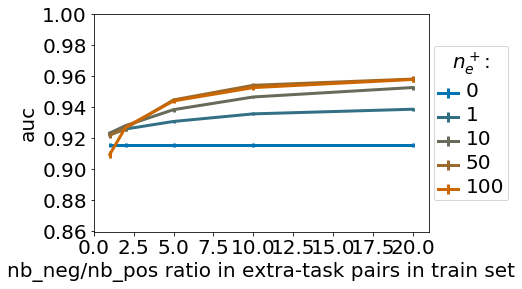

[0.92681771274651359, 0.92681771274651359, 0.92681771274651359, 0.92681771274651359, 0.92681771274651359]
[0.92922690019487697, 0.93219654184529377, 0.93660304257616811, 0.94057960143676633, 0.94316499273795773]
[0.93547948156927507, 0.93968352581215164, 0.94599125761973546, 0.95142046140957948, 0.95466466622631363]
[0.93042034016828956, 0.93687249190553834, 0.95052473855070541, 0.95673446643516902, 0.95877586730076725]
[0.92245301054376405, 0.93650831106130994, 0.94914334225870589, 0.95538132819381882, 0.95829576942062389]


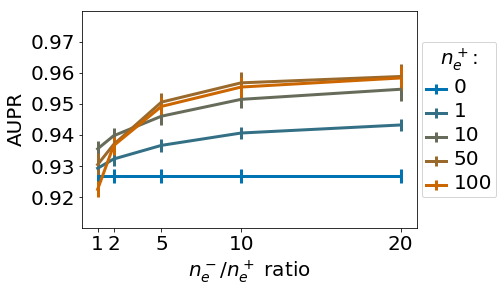

[0.96433037801375809, 0.96433037801375809, 0.96433037801375809, 0.96433037801375809, 0.96433037801375809]
[0.96393959126427564, 0.96469478394443331, 0.96693999198557412, 0.96829810325252119, 0.96925666199158478]
[0.95972684164830036, 0.96211430575035073, 0.96573799505777069, 0.96832106124357176, 0.96921650637814738]
[0.96253072196620582, 0.96482426701395851, 0.96728302611367123, 0.96865449475722976, 0.96102000267147547]
[0.94790456154411273, 0.95635443798837916, 0.96564107059373538, 0.96954518132638756, 0.97043035797769317]


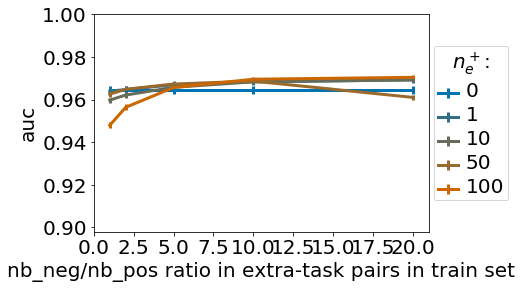

[0.96301839591939342, 0.96301839591939342, 0.96301839591939342, 0.96301839591939342, 0.96301839591939342]
[0.96425252182533117, 0.96552112599612061, 0.96773082422147472, 0.96897842870358986, 0.96976010859860229]
[0.96458683945188961, 0.9665003037232468, 0.9683960314708242, 0.97005729113391026, 0.97054680670262972]
[0.96320090770463063, 0.96503624614624484, 0.96658635866528275, 0.96631051287333503, 0.96653546789524669]
[0.95312578187729724, 0.95876147597488448, 0.96567332465432321, 0.96743668152063456, 0.96562515556847539]


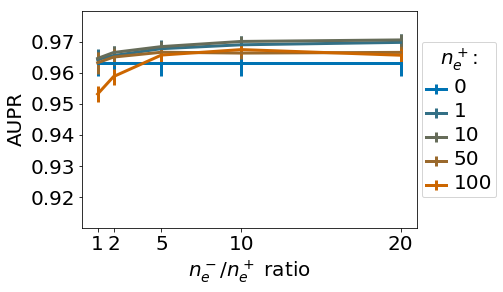

[0.95914134628560865, 0.95914134628560865, 0.95914134628560865, 0.95914134628560865, 0.95914134628560865]
[0.96014784040968615, 0.96061707183287726, 0.9609197673466171, 0.96070072798319583, 0.96037095582683518]
[0.96500901972460629, 0.96603230330808632, 0.9663691600340214, 0.96526183210462957, 0.96285560172063822]
[0.95533605898399121, 0.95764097031817685, 0.96154165668680491, 0.96358473009342704, 0.96390654424012845]
[0.9426469155336854, 0.94715503095665765, 0.95687467221734601, 0.96032000515523752, 0.96403076682992872]


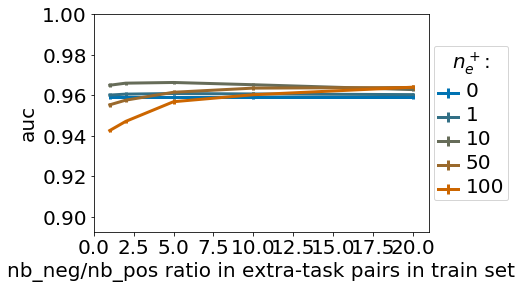

[0.9634406495545883, 0.9634406495545883, 0.9634406495545883, 0.9634406495545883, 0.9634406495545883]
[0.96563685330525029, 0.96643095172377547, 0.9668619368570136, 0.96671169816450608, 0.96664879755397592]
[0.96721803910858051, 0.9681350947786358, 0.96889820511555724, 0.96812471362983366, 0.96844516793153212]
[0.96277108539799716, 0.96420503761153964, 0.9664264648917763, 0.96766678845733878, 0.96968450025848685]
[0.95386808473535356, 0.95725997557610043, 0.96375268397414837, 0.9674475538127898, 0.96981164817202015]


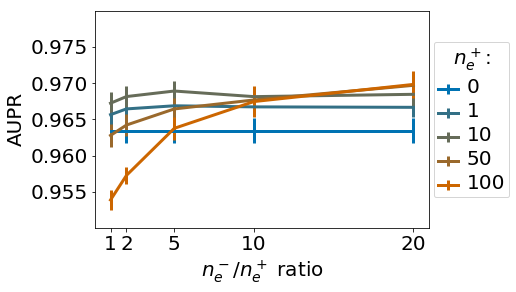

[0.96465935254409807, 0.96465935254409807, 0.96465935254409807, 0.96465935254409807, 0.96465935254409807]
[0.96600347978529677, 0.96614759739924483, 0.96652405007567876, 0.96692651185685219, 0.967402245556228]
[0.96792398043338934, 0.96862001513186424, 0.96987000494172992, 0.97074228043948396, 0.97111038691066565]
[0.96023440802695326, 0.96333240295789513, 0.96871114404735059, 0.97152012735921023, 0.97145762786871692]
[0.95576103610956598, 0.95985582027475713, 0.96787176812611397, 0.96999975931873228, 0.9705631281732563]


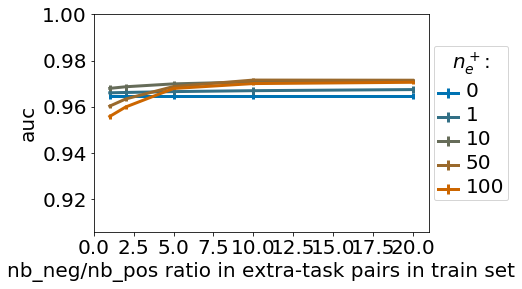

[0.96962857788999812, 0.96962857788999812, 0.96962857788999812, 0.96962857788999812, 0.96962857788999812]
[0.97035798796332273, 0.970516376457909, 0.97099011212192088, 0.97142679391880393, 0.97179561010727222]
[0.97215708835227055, 0.9729484316459287, 0.97382304005378384, 0.97454674526745422, 0.97447269856556917]
[0.96820987606279851, 0.9699667015046004, 0.97282787412546656, 0.97421694729567232, 0.97409480159588813]
[0.96539254163175769, 0.96794723311487618, 0.97240929205591153, 0.97345104009736816, 0.97360506281986925]


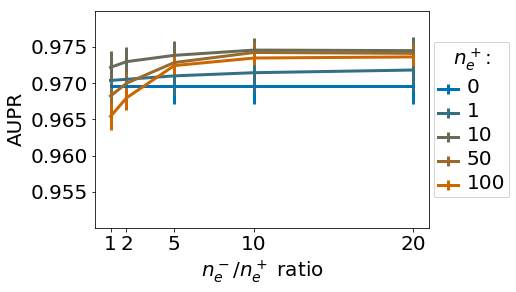

[0.85442376122085051, 0.85442376122085051, 0.85442376122085051, 0.85442376122085051, 0.85442376122085051]
[0.87661515872863693, 0.87661241943039037, 0.87753213881667791, 0.87410356464880834, 0.87262126188513023]
[0.91269959211849105, 0.91000104093333367, 0.90530108996677239, 0.90266040645707379, 0.89758791092897816]
[0.90206529391300538, 0.89949583215771789, 0.8928331739974853, 0.89680173233221117, 0.89925545873658086]
[0.87398303552595891, 0.87425799258745895, 0.87948834017701349, 0.8879835888642047, 0.89094922162840318]


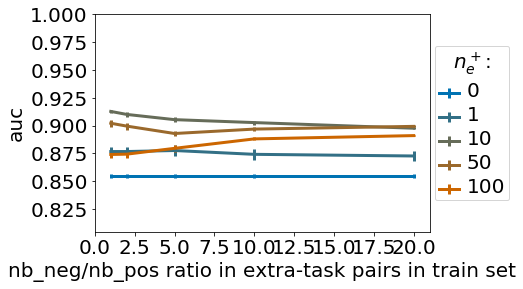

[0.89181915850011551, 0.89181915850011551, 0.89181915850011551, 0.89181915850011551, 0.89181915850011551]
[0.90777304497467748, 0.90759004306402202, 0.90735997631447307, 0.90467177934313636, 0.9030096469826514]
[0.93227075215954014, 0.92942981577379624, 0.92534782734747911, 0.92180440231574301, 0.91506541398922459]
[0.91863825240816677, 0.91550696968732947, 0.91337560527117168, 0.91572060271058586, 0.91548753651357284]
[0.89832341555149076, 0.8967146037311744, 0.90124492183257343, 0.9077482571489689, 0.9083897570593602]


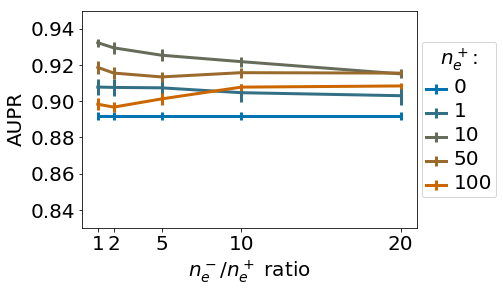

[0.88324734219587619, 0.88324734219587619, 0.88324734219587619, 0.88324734219587619, 0.88324734219587619]
[0.86555832376861697, 0.86742686758506204, 0.87017506855093862, 0.87358754934160965, 0.8769890729392944]
[0.88186707829188316, 0.88488544254732826, 0.8897165374174445, 0.89373132141008105, 0.89744238570962886]
[0.85655596249352839, 0.86367402898725398, 0.87465895736830135, 0.88624858583728017, 0.89531429338432078]
[0.81197114423227057, 0.82397543397332473, 0.85921273938042553, 0.87595327578980808, 0.88990554899645802]


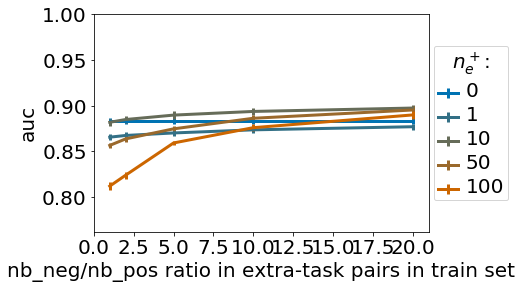

[0.90987234956002094, 0.90987234956002094, 0.90987234956002094, 0.90987234956002094, 0.90987234956002094]
[0.89356172159412672, 0.89575210001026484, 0.89868812255034769, 0.90137024674742161, 0.90414318513412706]
[0.89677838807468924, 0.89925470221252723, 0.90357916668807925, 0.90750011663497043, 0.91158617185040569]
[0.87778606839114581, 0.8848271701456516, 0.89566988155287175, 0.9054485913751501, 0.9128485703759146]
[0.86155180297265488, 0.87023415031454865, 0.88142828494580905, 0.89723362902247317, 0.90902164201873159]


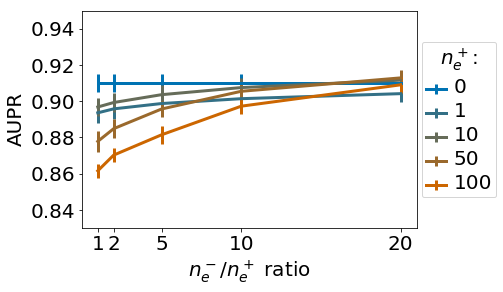

[0.91537392306151066, 0.91537392306151066, 0.91537392306151066, 0.91537392306151066, 0.91537392306151066]
[0.9286318707005945, 0.9285751018499967, 0.92841164095371664, 0.92824091698390432, 0.9278140653175716]
[0.93020503573098245, 0.93134408602150531, 0.93385794429973945, 0.93640235757697177, 0.93888841581513394]
[0.93450844854070669, 0.93967215988779795, 0.94587941628264205, 0.941763090229079, 0.94863504307753954]
[0.91290522941294339, 0.92803771789220602, 0.94547385293528341, 0.9431903259199893, 0.95189866760168296]


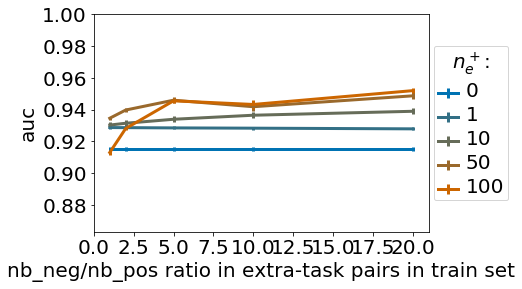

[0.92681771274651359, 0.92681771274651359, 0.92681771274651359, 0.92681771274651359, 0.92681771274651359]
[0.93234666660035026, 0.93188174592116413, 0.93173266031949997, 0.93138918631389933, 0.93079597779707191]
[0.93801214615940354, 0.93864230165219531, 0.94030854158052413, 0.94127588166685849, 0.94238884856490679]
[0.94076985648279077, 0.94433247728562808, 0.94732435494664358, 0.94763785208410878, 0.9517505507612406]
[0.92763076360558638, 0.93844894171449567, 0.9484850191490044, 0.94899740015331346, 0.95469208499723601]


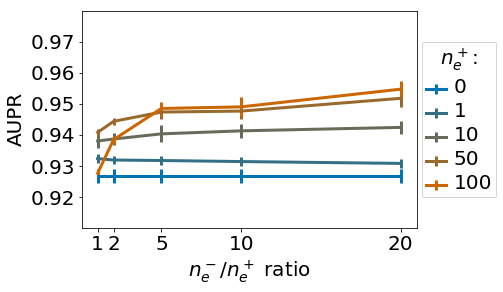

[0.96433037801375809, 0.96433037801375809, 0.96433037801375809, 0.96433037801375809, 0.96433037801375809]
[0.96446670673879653, 0.96448056501703072, 0.96455803780137583, 0.96467299472383627, 0.96489714820009354]
[0.96585695919321446, 0.96595839177185605, 0.96620349963267205, 0.966510468843919, 0.96534520470179663]
[0.96237978361049892, 0.96411064916850331, 0.96730206037534228, 0.96901522740933677, 0.97032049355506578]
[0.95661565818473249, 0.96086430575035053, 0.96719845722300146, 0.97002128831897416, 0.9685068957456755]


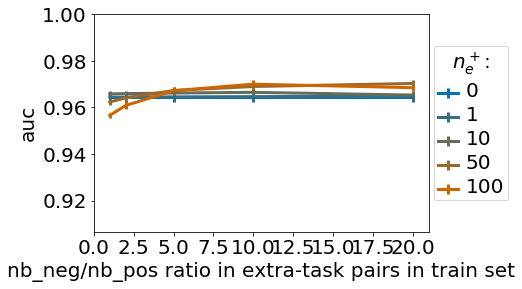

[0.96301839591939342, 0.96301839591939342, 0.96301839591939342, 0.96301839591939342, 0.96301839591939342]
[0.96310416534743604, 0.96317947563097162, 0.96329420696974755, 0.96344510632201774, 0.96370871933597213]
[0.96211842271207493, 0.96227786498126167, 0.96260939834175674, 0.96311377790561248, 0.96519947321992061]
[0.96044708252767352, 0.96190529371720657, 0.96467691047625703, 0.96653457221125683, 0.96792656079210015]
[0.95720895649671145, 0.96078845403804636, 0.96568087329523089, 0.96798170730037947, 0.96991747818139906]


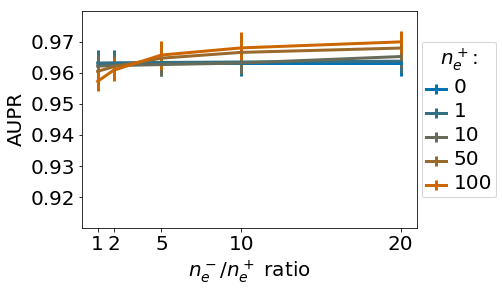

[0.95914134628560865, 0.95914134628560865, 0.95914134628560865, 0.95914134628560865, 0.95914134628560865]
[0.96008514682139634, 0.96003545778547617, 0.95993035382863723, 0.95972334852860275, 0.95936329711597845]
[0.96326990346740193, 0.96333822589179197, 0.96313452025429913, 0.9621591788265702, 0.96067753329650651]
[0.96144781040216676, 0.96431143224375881, 0.96543991683297614, 0.9639820482829915, 0.96157863231705032]
[0.95336140505065747, 0.95984543604264094, 0.9650440543768859, 0.96378368033490414, 0.96096198361736951]


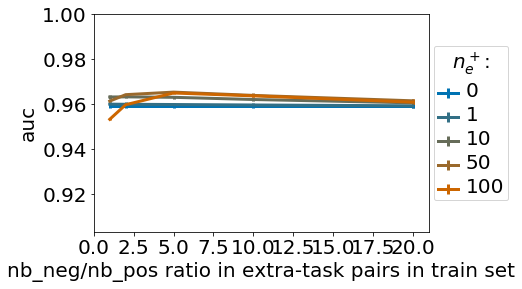

[0.9634406495545883, 0.9634406495545883, 0.9634406495545883, 0.9634406495545883, 0.9634406495545883]
[0.96429733715223831, 0.96424919053330727, 0.9642127447757608, 0.96407487680494164, 0.96384559778106538]
[0.96758051958930613, 0.96760382866540973, 0.96741758394745192, 0.96668720638783523, 0.96560494151605647]
[0.96810469074343164, 0.97007956499426251, 0.970554467015325, 0.96918072856191495, 0.96695930669107377]
[0.96298704676951319, 0.96744476448836259, 0.9705329013690509, 0.96907509460501329, 0.96776792430419523]


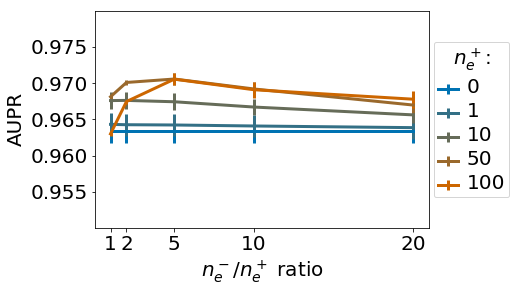

[0.96465935254409807, 0.96465935254409807, 0.96465935254409807, 0.96465935254409807, 0.96465935254409807]
[0.9651245079135613, 0.96511315319246238, 0.96508054476263982, 0.96499155092291566, 0.96488508828150077]
[0.96821367139475945, 0.96809100158733186, 0.96784731180374695, 0.96743572742613515, 0.96625173086710081]
[0.96811516676300391, 0.96838806826497148, 0.96861739481161069, 0.96893639454026192, 0.96813156802681344]
[0.96495797200411015, 0.96597844116954013, 0.96754655726797267, 0.96821173041679398, 0.96928635286746501]


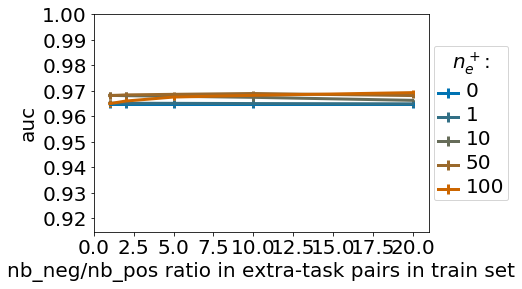

[0.96962857788999812, 0.96962857788999812, 0.96962857788999812, 0.96962857788999812, 0.96962857788999812]
[0.96997574145068433, 0.96997261176316663, 0.96997619097786658, 0.96989456936999296, 0.96986232875259903]
[0.97219357572026854, 0.97214083692112307, 0.972030293168758, 0.97186509060234449, 0.97189168348401933]
[0.97279821667161537, 0.9728731789566073, 0.97313030662420896, 0.97361883902985902, 0.97362253833130286]
[0.97026157445870076, 0.97108942273888421, 0.97260174933222432, 0.97340983109020762, 0.97445480747808899]


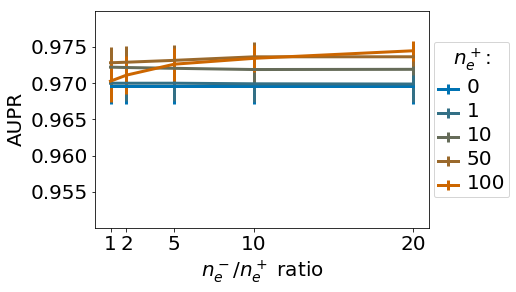

[0.85442376122085051, 0.85442376122085051, 0.85442376122085051, 0.85442376122085051, 0.85442376122085051]
[0.86311315767126784, 0.8629464028905075, 0.86245469885524728, 0.86164112727601438, 0.86010266889828157]
[0.91075400553886099, 0.90938332917873099, 0.90475733926482715, 0.89715304733233447, 0.86966008048058252]
[0.91609324023371697, 0.9195361957173811, 0.92032682567379887, 0.91130015312677204, 0.89193023281295791]
[0.90267376053602577, 0.91136007527591578, 0.91802855444492226, 0.90874918163464891, 0.89124095689166349]


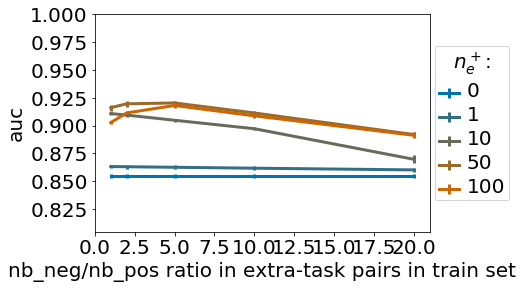

[0.89181915850011551, 0.89181915850011551, 0.89181915850011551, 0.89181915850011551, 0.89181915850011551]
[0.89699657207508954, 0.89689441839894035, 0.89659643746110407, 0.89602088018395676, 0.89488557978026073]
[0.92131334540416132, 0.92014765219270345, 0.91599186605767202, 0.90898947791744855, 0.89967394864760974]
[0.92742495051085483, 0.93211708438215846, 0.93390384669592752, 0.92337978498753204, 0.90454036072266808]
[0.91725922400735371, 0.92687169668855962, 0.93295584100559015, 0.92060900350164465, 0.90225287944478194]


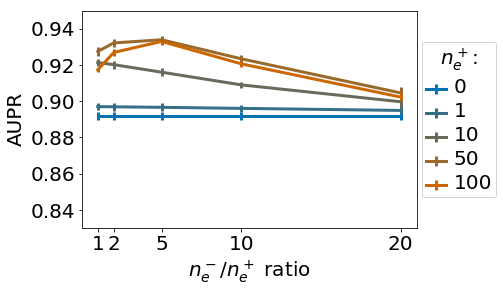

[0.88324734219587619, 0.88324734219587619, 0.88324734219587619, 0.88324734219587619, 0.88324734219587619]
[0.87606764149160266, 0.87603237302667814, 0.87611797609688347, 0.87606455978107522, 0.87612448193021908]
[0.87726368758851359, 0.87751501820263678, 0.87810088561512312, 0.87896376456279435, 0.87202204039369191]
[0.86399863582947323, 0.86748370802367847, 0.8750239688596575, 0.88221839329200646, 0.887448740881561]
[0.84818466705199458, 0.8566980635900695, 0.87076264802482906, 0.88088093092311615, 0.8873669043464445]


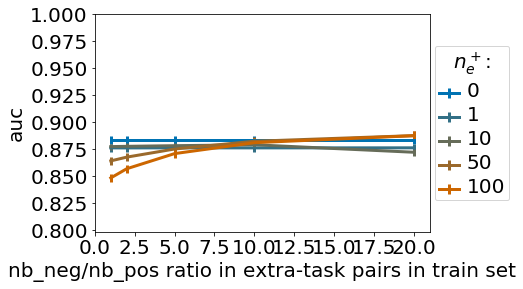

[0.90987234956002094, 0.90987234956002094, 0.90987234956002094, 0.90987234956002094, 0.90987234956002094]
[0.90599464134967578, 0.90599540237742127, 0.9060237493940928, 0.90602075066146182, 0.90602459970643989]
[0.89588018528610236, 0.89621638703353967, 0.89705884521610679, 0.89837067235194257, 0.90105042250793543]
[0.87613725710528745, 0.88182922581043921, 0.89310300149394117, 0.90184926528258769, 0.90855076067721063]
[0.85281157927386064, 0.86889951912205587, 0.89151299521067318, 0.90351900738040447, 0.91059786681942756]


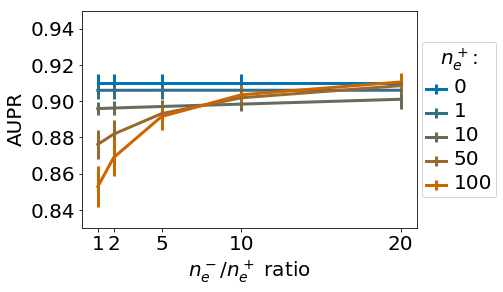

In [25]:
## en Intra fixé, voir effet Family ou Tot kernel couplé avec nb_pos en fct de nb_neg (sur x_axis) pour chaque NbNeg_MT (plot différent pour chaque nb_neg)
difficulty = 'normal'

for type_clf in list_type_of_clf_MT:
    for type_of_SingleTask in list_type_of_SingleTask_MT:
        for script in list_script_MT:
            for family in list_family:
                for type_family in list_type_family:

                    if script=='MultiNeerestNeiLOOCV':
                        add_legend = 'NN'
                    else:
                        add_legend = 'RN'                            

                    list_of_list_of_auc_local = []
                    list_of_list_of_auc_local_stdev = []
                    list_of_list_of_aupr_local = []
                    list_of_list_of_aupr_local_stdev = []

                    title_legend = r'$n_e^+$:'

                    list_nom = []
                    NbNeg = best_NbNeg[difficulty][type_family]
                    for nb_pos in list_nb_pos:
                        list_nom.append(nb_pos)
                        list_of_list_of_auc_local.append(dico_auc_type_SingleTask_MT[script][type_clf][type_family][family][type_of_SingleTask][NbNeg]['Intra'][nb_pos])
                        list_of_list_of_auc_local_stdev.append(dico_auc_stdev_type_SingleTask_MT[script][type_clf][type_family][family][type_of_SingleTask][NbNeg]['Intra'][nb_pos])
                        list_of_list_of_aupr_local.append(dico_aupr_type_SingleTask_MT[script][type_clf][type_family][family][type_of_SingleTask][NbNeg]['Intra'][nb_pos])
                        list_of_list_of_aupr_local_stdev.append(dico_aupr_stdev_type_SingleTask_MT[script][type_clf][type_family][family][type_of_SingleTask][NbNeg]['Intra'][nb_pos])

                    #dico_plot = {'pp':None, 'f_out':None}
                    #if plot_option=="save" or plot_option=="print_and_save":
                    #    dico_plot['pp'] = PdfPages('saved_results/plots/family/'+script+'_'+family+'_'+type_family+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_Family-TotKernel.pdf')
                    #    dico_plot['f_out'] = open('saved_results/plots/family/'+script+'_'+family+'_'+type_family+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_Family-TotKernel.txt', 'w')
                    #legend = plot_score_curve('', list_of_list_of_auc_local, list_of_list_of_auc_local_stdev, \
                    #                 list_nb_neg, 'auc', 'nb_neg/nb_pos ratio in extra-task pairs in train set', \
                    #                 list_nom, title_legend, plot_option, **dico_plot)
                    #if plot_option=="save" or plot_option=="print_and_save":
                    #    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                    #    dico_plot['pp'].close()
                    #    dico_plot['f_out'].close()
                    #if plot_option=="print" or plot_option=="print_and_save":
                    #    plt.show()
                        
                    dico_plot = {'pp':None, 'f_out':None}
                    if plot_option=="save" or plot_option=="print_and_save":
                        dico_plot['pp'] = PdfPages('saved_results/plots/family/'+script+'_'+family+'_'+type_family+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_Family-TotKernel.pdf')
                        dico_plot['f_out'] = open('saved_results/plots/family/'+script+'_'+family+'_'+type_family+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_Family-TotKernel.txt', 'w')
                    legend = plot_score_curve('', list_of_list_of_aupr_local, list_of_list_of_aupr_local_stdev, \
                                     list_nb_neg, r'AUPR', r'$n_e^-/n_e^+$ ratio', list_nom, \
                                     title_legend, plot_option, **dico_plot)
                    if family == 'GPCR':
                        plt.ylim([0.91,0.98])
                        plt.yticks(np.arange(0.92,0.98,0.01))
                    if family == 'IC':
                        plt.ylim([0.95,0.98])
                        plt.yticks(np.arange(0.955,0.975,0.005))
                    if family == 'kinase':
                        plt.ylim([0.83,0.95])
                        plt.yticks(np.arange(0.84,0.95,0.02))  
                    plt.xlim([0,21])
                    plt.xticks([int(i) for i in list_nb_neg])
                    if plot_option=="save" or plot_option=="print_and_save":
                        plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                        dico_plot['pp'].close()
                        dico_plot['f_out'].close()
                    if plot_option=="print" or plot_option=="print_and_save":
                        plt.show()


